## 13장 과적합 피하기

### 초음파 광물 예제 ( sonar.csv )

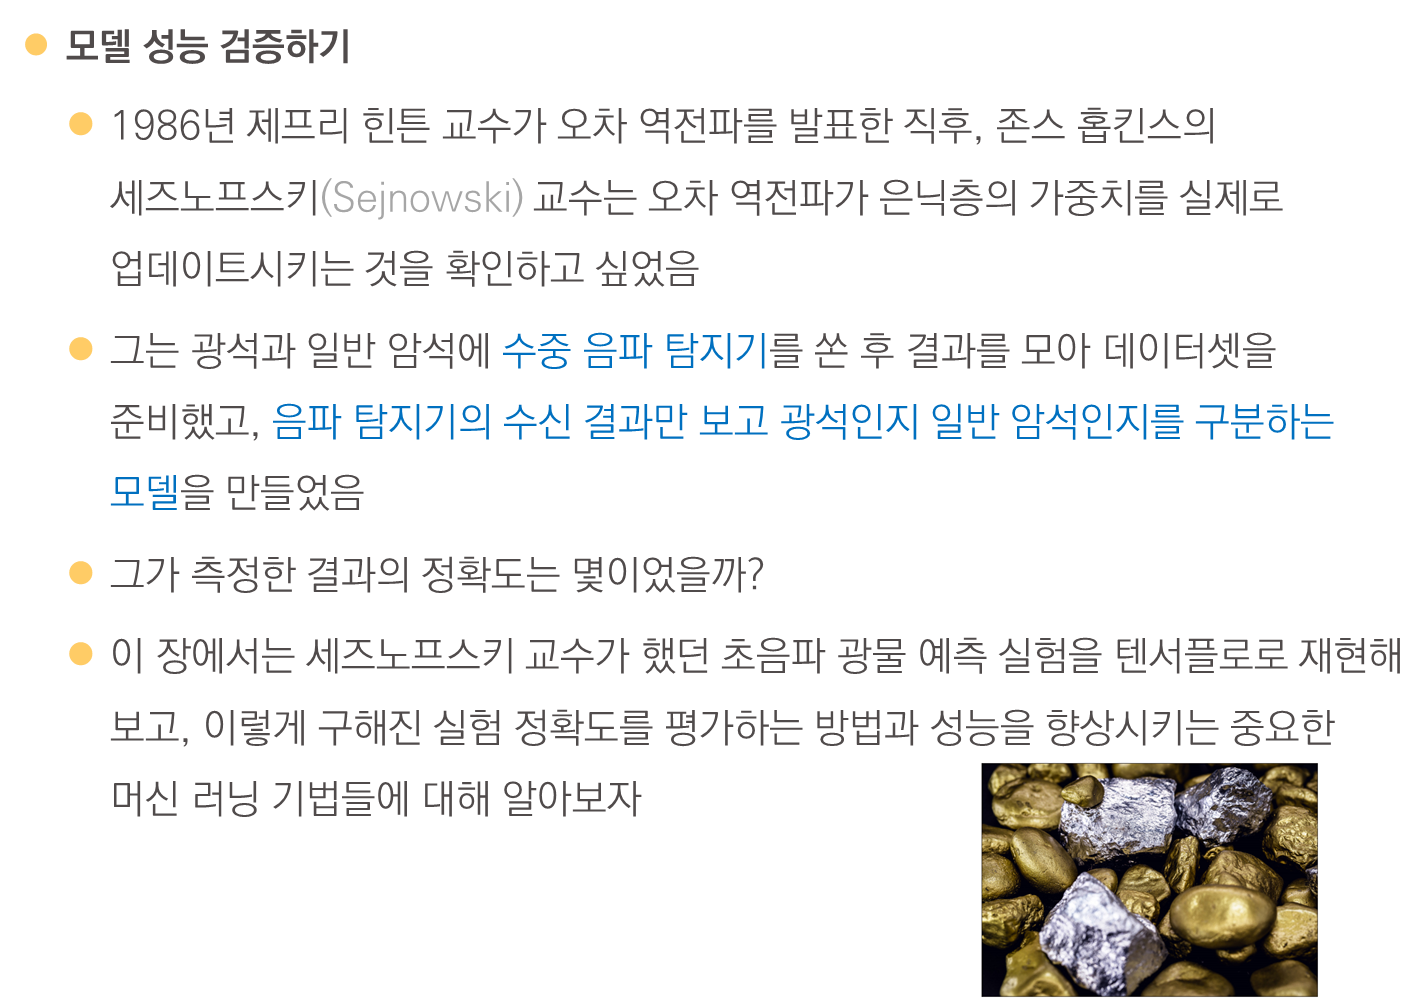

In [ ]:
import pandas as pd

df_sonar = pd.read_csv('../data/sonar.csv', header=None)

In [ ]:
df_sonar

In [ ]:
df_sonar.iloc[:, -1]     # M :  광석,  R : 일반 암석

In [ ]:
df_sonar.iloc[:, -1].value_counts()

In [ ]:
########################################################
# 13-1 과적합 피하기 - 초음파광물 (sonar)
########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import tensorflow as tf

# 데이터 Read
df_sonar = pd.read_csv('../data/sonar.csv', header=None) # 첫번째 줄이 header가 안되도록
X = df_sonar.iloc[:, :-1].values
print("X.dtype:", X.dtype)  # float type인지 확인 필요 -> 아니면 X = X.astype(float) 필요
Y = df_sonar.iloc[:, -1].values
X, Y

In [ ]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y)
Y_encoded = e.transform(Y)
Y_encoded, e.classes_  # M : 0 광석(Mineral), R: 1 일반암석(Regular)

In [ ]:
# 모델 설정
model = Sequential()
model.add(Dense(120, input_dim=60, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
hist = model.fit(X, Y_encoded, epochs=100, batch_size=5)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

### 학습 결과 분석

In [ ]:
model.evaluate(X, Y_encoded)   # 몇개 맞췄나?

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['loss'])

## model.predict로 검증

In [ ]:
# X[10:50:10]  # 4개 X 데이터

In [ ]:
Y_hat = model.predict(X[10:200:50])  # X 데이터로 Y_hat 구해보기
Y_hat

In [ ]:
# 예측 데이터
Y_predicted = (Y_hat > 0.5).astype(int)
Y_predicted

In [ ]:
# 실제 데이터
Y[10:200:50]

In [ ]:
# M, R이었던 Y데이터를 숫자로 인코딩 하였기 때문에 기록을 보면
e.classes_

In [ ]:
Y_predicted.flatten()

In [ ]:
e.classes_[Y_predicted.flatten()]  # 검증 완료!!! (모두 맞춤)

In [ ]:
(Y[10:200:50] == e.classes_[Y_predicted.flatten()]).all()

## 하나의 코드로 정리

In [ ]:
########################################################
# 13-1 과적합 피하기 - 초음파광물 (sonar)
########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# 데이터 입력
df_sonar = pd.read_csv('../data/sonar.csv', header=None) # 첫번째 줄이 header가 안되도록

X = df_sonar.iloc[:, :-1].values
Y = df_sonar.iloc[:, -1].values

# M->0 초음파 광석(minaral), R->1 일반광물 : 숫자로 인코딩(0, 1)
e = LabelEncoder()
# e.fit(Y)  # Y데이터를 문자에서 정수로 인코딩 수행
Y_encoded = e.fit_transform(Y)
Y_encoded, e.classes_  # M : 0 광석(Mineral), R: 1 일반암석(Regular)

# 모델 설정
model = Sequential()
model.add(Dense(120, input_dim=60, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
hist = model.fit(X, Y_encoded, epochs=200, batch_size=5)

# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

import matplotlib.pyplot as plt
pd.DataFrame(hist.history).plot()

---
## 과적합 여부를 확인하기 위해 train_test_split 사용

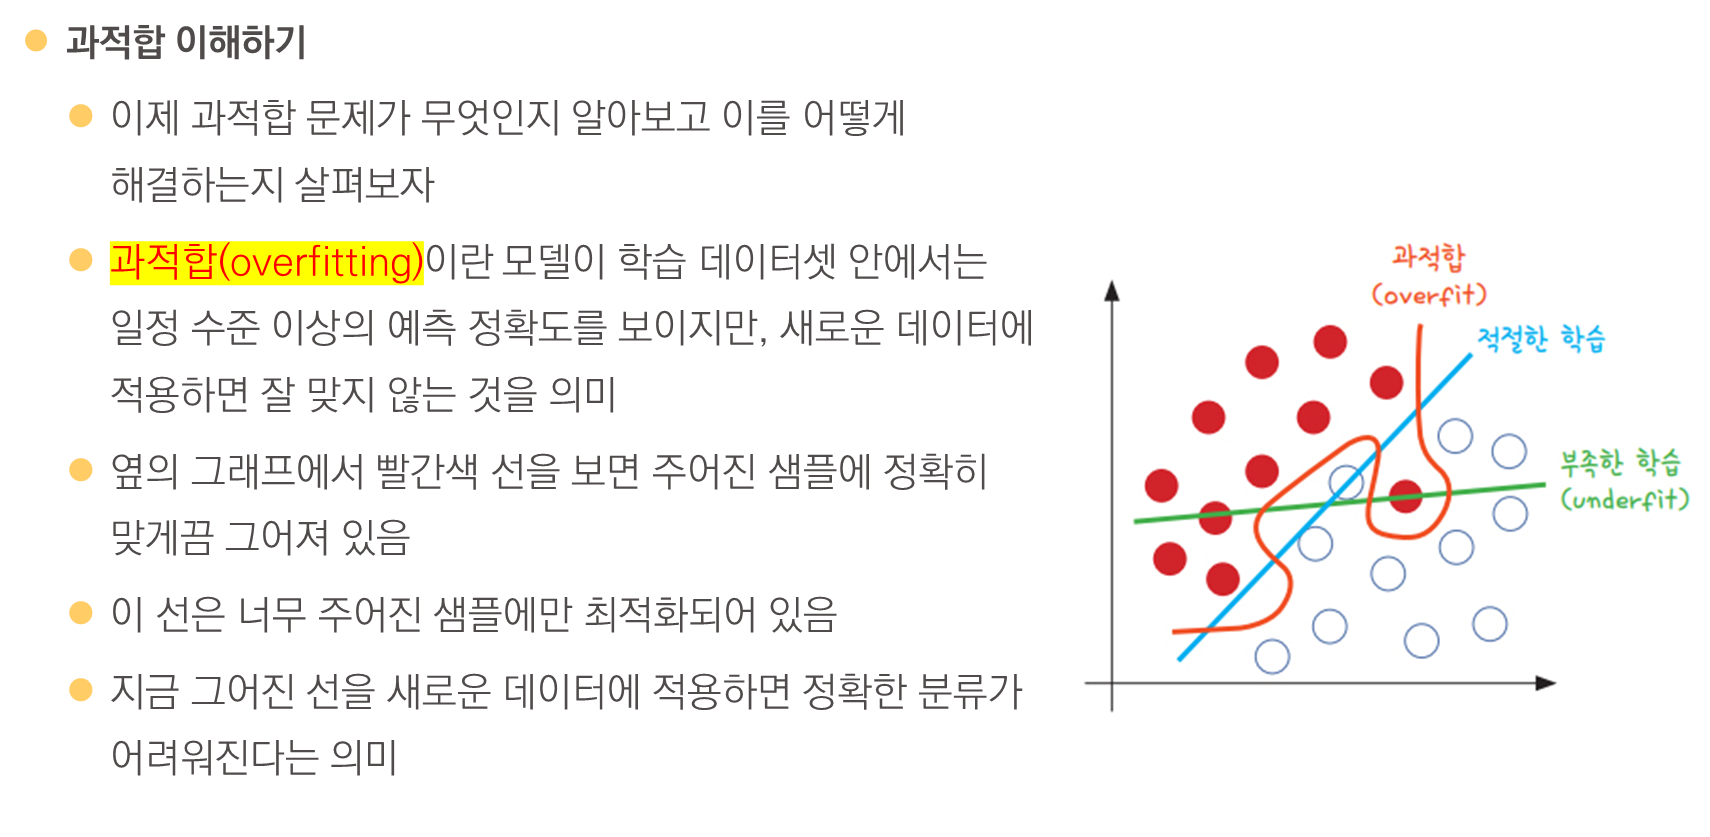

* 과적합은 층이 너무 많거나 변수가 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도 함
* 특히 딥러닝은 학습 단계에서 입력층, 은닉층, 출력층의 노드들에 상당히 많은 변수가 투입
* 딥러닝을 진행하는 동안 과적합에 빠지지 않게 늘 주의해야 함


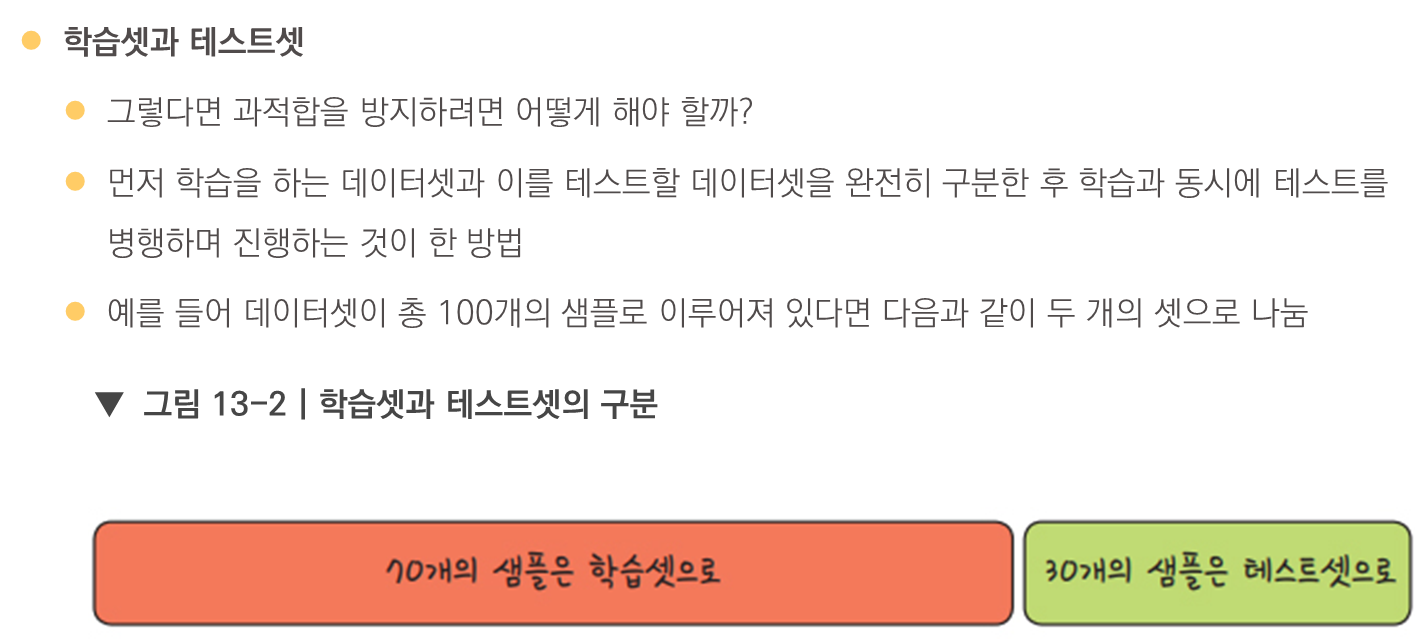

* model.fit에서 validata_data를 지정해주면 history에 검증데이터 셋에 대한 `"val_loss"`와 `"val_accuracy"`가 추가로 출력된다.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. 데이터 생성 (0부터 9까지)
X = np.arange(10).reshape(-1, 1) # 2차원 배열 형태 (Feature)
y = np.arange(10)                # 1차원 배열 형태 (Target)

print("=== 분할 전 데이터 ===")
print(f"X (전체): {X.flatten()}")
print(f"y (전체): {y}")
print("-" * 30)

# 2. 데이터 분할 (Train: 80%, Test: 20%)
# test_size=0.2 : 테스트 데이터 비율
# random_state=42 : 난수 시드 고정 (재현 가능성 확보)
# shuffle=True : 데이터를 무작위로 섞음 (기본값)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# 3. 결과 확인
print("=== 분할 후 데이터 (Shuffle 적용됨) ===")
print(f"X_train (학습용 8개): {X_train.flatten()}")
print(f"y_train (학습 정답): {y_train}")
print(f"X_test  (평가용 2개): {X_test.flatten()}")
print(f"y_test  (평가 정답): {y_test}")

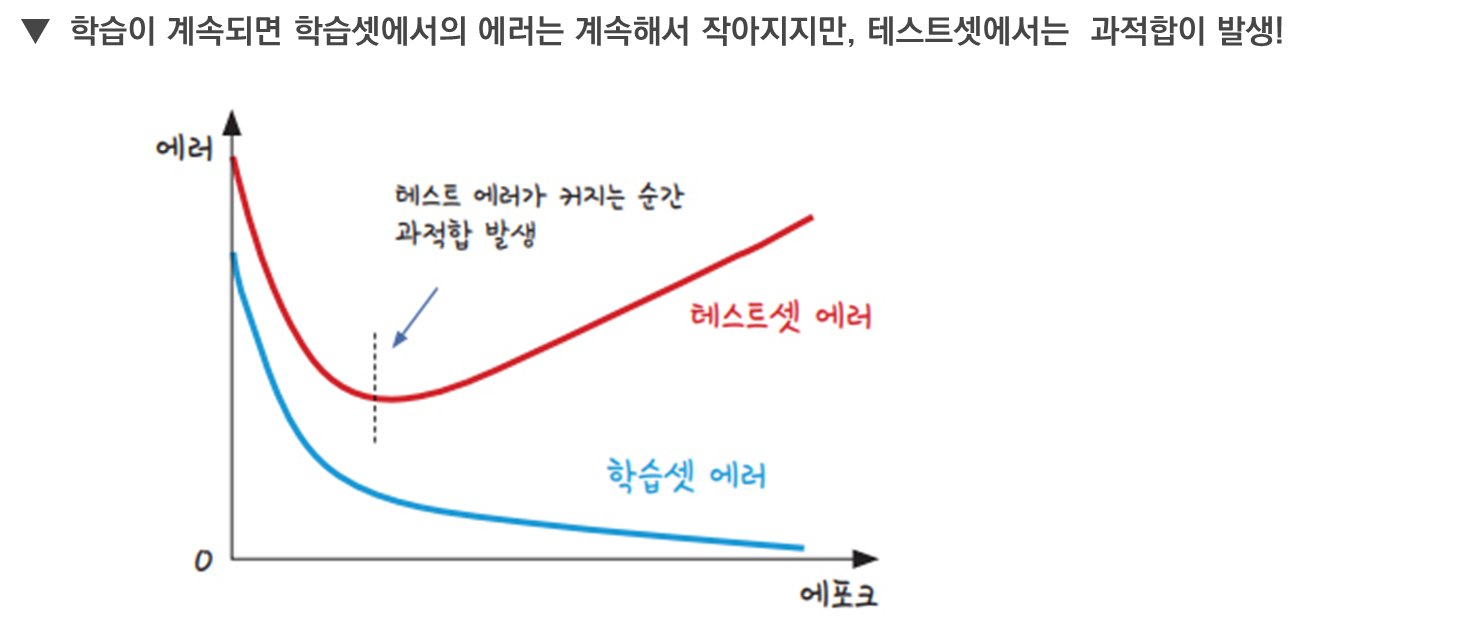

* 학습을 진행해도 테스트 결과가 더 이상 좋아지지 않는 지점에서 학습을 멈추어야 함
* 이때 학습 정도가 가장 적절한 것으로 볼 수 있음


In [ ]:
##########################################################
# 13-3 학습셋과 테스트셋 (코드13-2 초음파 광물 예측)
##########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np

# 데이터 읽기
df_sonar = pd.read_csv('../data/sonar.csv', header=None) # 첫번째 줄이 header가 안되도록

X = df_sonar.iloc[:, :-1].values
Y = df_sonar.iloc[:, -1].values

# M->0 초음파 광석(minaral), R->1 일반광물 : 숫자로 인코딩(0, 1)
e = LabelEncoder()
e.fit(Y)  # Y데이터를 문자에서 정수로 인코딩 수행
Y_encoded = e.transform(Y)

# 학습셋과 테스트셋의 구분
seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.3, random_state=seed)

model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X_train, Y_train, epochs=200, batch_size=5,
                validation_data=(X_test, Y_test))

# 학습셋으로 모델 검증 
print("\n Train Accuracy: %.4f" % (model.evaluate(X_train, Y_train) [1]))

# 테스트셋에 모델 적용 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))


## 모델 검증하기

In [ ]:
# 학습셋으로 모델 검증 
print("\n Train Accuracy: %.4f" % (model.evaluate(X_train, Y_train) [1]))

# 테스트셋에 모델 적용 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test) [1]))

위의 결과를 보면, Train set와  Test set의 정확도 차이가 1.0과 0.79로 차이가 큰 것을 볼 수 있다.  
### 다시 그래프로 그려보면

In [ ]:
hist.history.keys()

In [ ]:
plt.plot(hist.history['val_loss'], label='val_loss')
plt.plot(hist.history['loss'], label='loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
model.summary()

### 모델 저장하기
| 항목               | HDF5 형식 (`.h5`, `.hdf5`)            | Keras 형식 (`.keras`)                       |
|--------------------|----------------------------------------|---------------------------------------------|
| 전체 명칭          | Hierarchical Data Format version 5     | Keras Native Format                         |
| 기반 구조          | HDF5 바이너리 포맷                     | TensorFlow SavedModel 기반 + Zip 구조      |
| 사용 시기          | TensorFlow/Keras 초기부터 사용         | TensorFlow 2.11 이상부터 권장               |
| 모델 정보 저장     | 모델 구조, 가중치, 옵티마이저 등       | 동일 + 추가 메타데이터 확장 가능           |
| 사용자 정의 객체   | 제한적 지원                            | 더 강력한 지원 (사용자 정의 레이어 등)     |
| 확장성             | 낮음                                   | 높음 (향후 기능 확장 고려)                 |
| 불러오기 방식      | `keras.models.load_model()` 사용        | 동일 (확장자 인식 기반 자동 처리)          |
| 권장 여부          | X : 과거 형식 (Legacy)                   | O : 현재 및 향후 권장                         |


In [ ]:
model.save('../data/sonar_model.hdf5')  # hdf5 또는  h5 파일로 저장한다. ()
# model.save('../data/sonar_model.keras')  # keras 확장자로 변경 2024. (Tensorflow 2.11 이상에서 도입)

In [ ]:
type(model)

### 모델 지우기

In [ ]:
# del model

In [ ]:
# type(model)  # Error !!! not defined

 ### 모델 불러오기

In [ ]:
from tensorflow.keras.models import Sequential, load_model

In [ ]:
sonar_model = load_model('../data/sonar_model.keras')

In [ ]:
sonar_model.summary()

In [ ]:
((sonar_model.predict(X_test) >= 0.5) * 1).flatten()

In [ ]:
Y_test

In [ ]:
## 정확도 계산
(((sonar_model.predict(X_test) >= 0.5) * 1).flatten() == Y_test).mean()

### 참고 : Teachable Machine 등 다른 프로그램에서 저장한 h5(hdf5) 모델을 읽어와서 사용할 수 있다.

In [ ]:
### Teachable Machine에서 저장한 모델 읽어 오기
teachable_model = load_model('C:/data/models/keras_model.h5')
teachable_model.summary()

In [ ]:
teachable_model.compile(loss='softmax',
                        optimizer='adam',
                        metrics=['accuracy'])

In [ ]:
teachable_model.summary()

### [연습문제] IRIS 데이터로 train_test_split을 하여 검증데이터셋을 분리하고, validation_data를 지정하여 학습하게 하여 val_accuracy 와 val_loss를 시각화 하라

In [ ]:
############################################################
# 13-3 과적합 피하기 (4) - IRIS data에 
# - IRIS data에 학습/테스트셋 분리 분석
###########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
seed = 0

# 데이터 입력
df_iris = pd.read_csv('../data/iris3.csv')
# df_iris = pd.read_csv('../data/iris.csv', 
#                  names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])

X = df_iris.iloc[:, 0:4].astype(float).values  # float tensor로 쓸 수 있도록
Y = df_iris.species.values

e = LabelEncoder()  # 라벨 인코더 정의
e.fit(Y)        # Y_obj의 문자데이터를 분석
Y_encoded = e.transform(Y) # 

Y_onehot = tf.keras.utils.to_categorical(Y_encoded) # One Hot Encoding
             # [1, 0, 0], [0, 1, 0], [0, 0, 1] 형태

# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size=0.3, random_state=seed)

## 모델 설계
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss= 'binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 학습
# hist = model.fit(X_train, Y_train, epochs=200, batch_size=5)
hist = model.fit(X_train, Y_train, epochs=200, batch_size=5,
                validation_data=(X_test, Y_test))

In [ ]:
# 학습셋 Accuracy 계산
print("\n Train Accuracy: %.4f" % (model.evaluate(X_train, Y_train)[1]))

# 테스트셋 Accuracy 계산 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

## hist.history를 pandas data frame으로 만들어서 시각화
df_history = pd.DataFrame(hist.history)
df_history.plot()

In [ ]:
## 모델의 재사용
sonar_model1 = load_model('../data/sonar_model.keras')   # 초음파 광물 모델
sonar_model1.summary()   # 

## k겹 교차검증

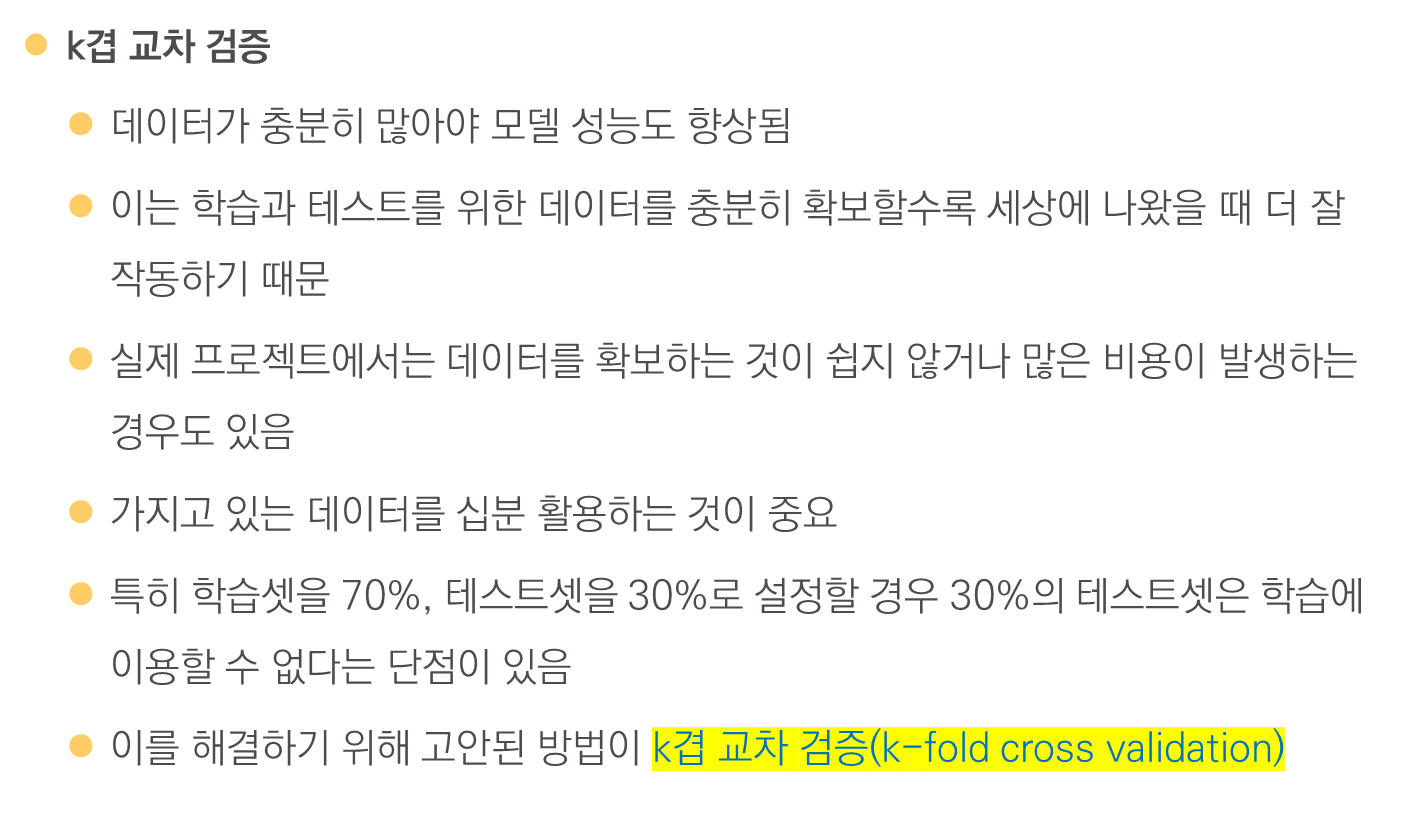
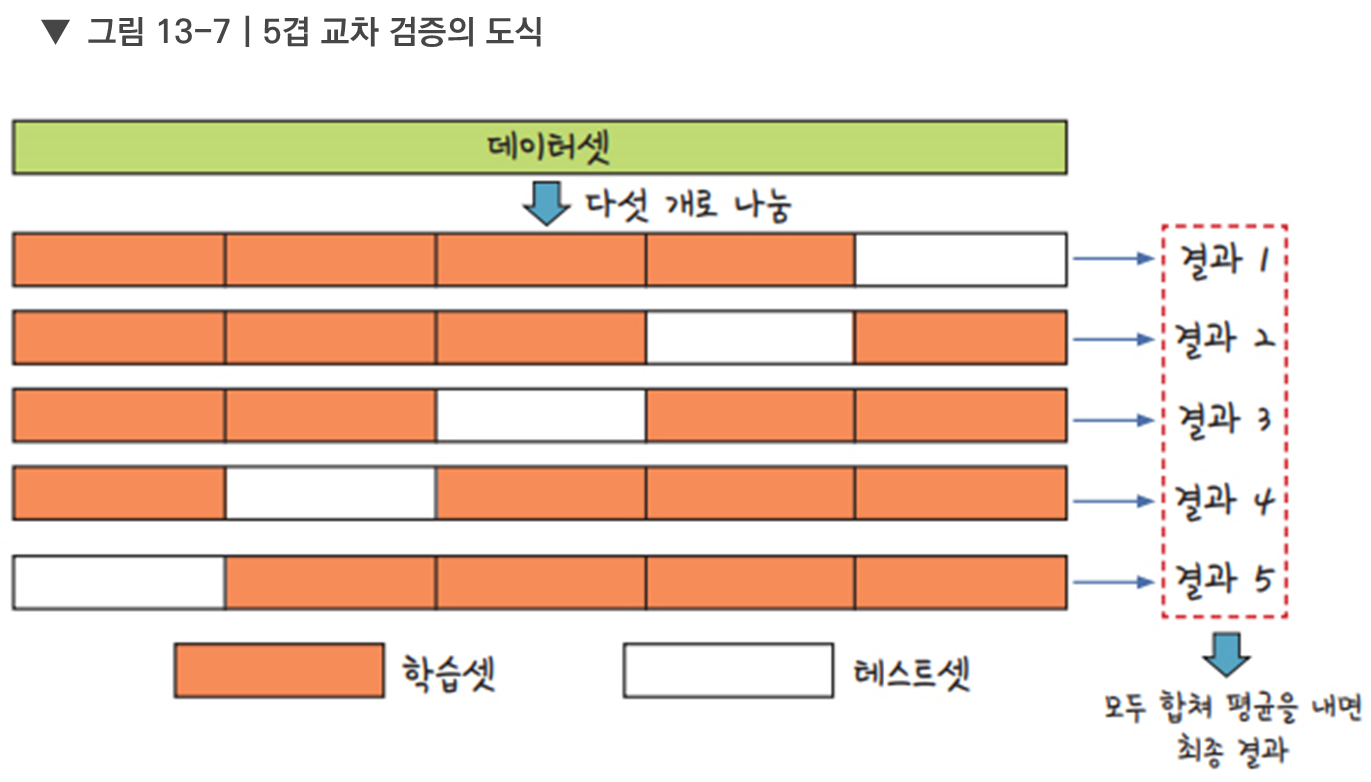

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

# 1. 샘플 데이터 생성 (0~9)
X = np.arange(10)
y = np.arange(10)

# 2. KFold 객체 생성 (5개의 폴드)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(f"전체 데이터: {X}")
print("-" * 50)

# 3. K-Fold 반복 수행
fold_idx = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    
    print(f"[Fold {fold_idx}]")
    print(f"  - 학습 데이터 index: {train_index} -> 데이터: {X_train}")
    print(f"  - 검증 데이터 index: {test_index} -> 데이터: {X_test}")
    fold_idx += 1

# 실제 모델링에서는 각 Fold의 성능 점수를 리스트에 담아 평균을 냅니다.

* K겹 교차 검증 전체 코드

In [ ]:
###########################################################
# k-Fold Cross Validation
###########################################################
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('../data/sonar3.csv', header=None)

# 음파 관련 속성을 X로, 광물의 종류를 y로 저장합니다.
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#몇 겹으로 나눌 것인지를 정합니다. 
k=5

#KFold 함수를 불러옵니다. 분할하기 전에 샘플이 치우치지 않도록 섞어 줍니다.
kfold = KFold(n_splits=k, shuffle=True)

#정확도가 채워질 빈 리스트를 준비합니다.
acc_score, history_list = [], []

def model_fn():
    model = Sequential() #딥러닝 모델의 구조를 시작합니다.
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

#K겹 교차 검증을 이용해 k번의 학습을 실행합니다. 
for train_index , test_index in kfold.split(X):  # for문에 의해서 k번 반복합니다. spilt()에 의해 k개의 학습셋, 테스트셋으로 분리됩니다.
    X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]  
    y_train , y_test = y.iloc[train_index], y.iloc[test_index]

    model1 = model_fn()
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model1.fit(X_train, y_train, epochs=200, batch_size=10, verbose=0) 
    
    accuracy = model1.evaluate(X_test, y_test)[1]  #정확도를 구합니다.
    acc_score.append(accuracy)  #정확도 리스트에 저장합니다.
    history_list.append(history.history)

#k번 실시된 정확도의 평균을 구합니다.
avg_acc_score = sum(acc_score)/k

#결과를 출력합니다.
print('정확도:', acc_score)
print('정확도 평균:', avg_acc_score)

In [ ]:
len(history_list)